In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))


Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


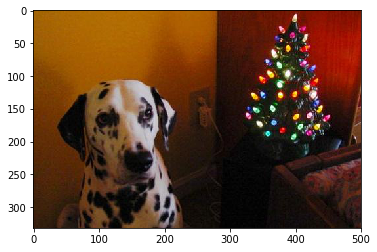

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline  

img = cv2.imread(train_files[1])
# convert BGR image to grayscale


cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [3]:
sharpen0 = np.array([0,-1,0,-1,5,-1,0,-1,0])
sharpens = np.array([0,-.5,0,-.5,3,-.5,0,-.5,0])
sharpen075 = np.array([-0.75, -.25, -.75, -.25,5, -.25, -.75,-.25,-.75])
sharpen025 = np.array([-0.25, -.75, -.25, -.75,5, -.75, -.25,-.75,-.25])
sharpen = np.array([0,-2,0,-2,9,-2,0,-2,0] )
sharpen1 = np.array([-.5,-1.5, -.5, -1.5,9, -1.5,-.5,-1.5,-.5])
sharpen2 = np.array([-1,-1,-1,-1,9,-1,-1,-1,-1])
sharpens.shape = (3,3)
sharpen075.shape = (3,3)
sharpen025.shape = (3,3)
sharpen0.shape = (3,3)
sharpen1.shape =(3,3)
sharpen2.shape = (3,3)
sharpen.shape = (3,3)

In [100]:
sharpen0

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

In [4]:
edge0 = np.array([0,1,0,1,-4,1,0,1,0])
edge0.shape = (3,3)
edge05 = np.array([0,.5,0,.5,-2,.5,0,.5,0])
edge05.shape = (3,3)
edge015 = np.array([0,.5,0,.5,-1.5,.5,0,.5,0])
edge015.shape = (3,3)
edge8 = np.array([1,1,1,1,-8,1,1,1,1])
edge8.shape = (3,3)
edge85 = np.array([0.5,1.5,0.5,1.5,-8,1.5,0.5,1.5,.5])
edge85.shape = (3,3)

In [44]:
from skimage.exposure import rescale_intensity
def convolve(image, kernel):
    # grab the spatial dimensions of the image, along with
    # the spatial dimensions of the kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW, 3), dtype="float32")
    kernel.shape = (3,3,1)
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            for channel in range(3):
                # extract the ROI of the image by extracting the
                # *center* region of the current (x, y)-coordinates
                # dimensions
                roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1, channel:channel+1]
                
                # perform the actual convolution by taking the
                # element-wise multiplicate between the ROI and
                # the kernel, then summing the matrix
                k = (roi * kernel).sum()
                #if x == 255 and y ==200 and channel == 0:
                #    print(roi, kernel, k, roi.shape)
                #print (k)
 
                # store the convolved value in the output (x,y)-
                # coordinate of the output image
                output[y - pad, x - pad, channel] = k
    
    output = rescale_intensity(output.reshape(-1), in_range=(0, 255))
    output = (output * 255).astype("uint8")
 
    # return the output image
    return output.reshape((iH,iW,-1))

In [33]:
new_img0 = convolve (cv_rgb, sharpen0)
new_imgs = convolve (cv_rgb, sharpens)
new_img075 = convolve (cv_rgb, sharpen075)
new_img025 = convolve(cv_rgb, sharpen025)
new_img = convolve(cv_rgb, sharpen)
new_img1 = convolve(cv_rgb, sharpen1)
new_img2 = convolve(cv_rgb, sharpen2)

[[[32]
  [36]
  [40]]

 [[28]
  [33]
  [40]]

 [[37]
  [37]
  [37]]] [[[ 0]
  [-1]
  [ 0]]

 [[-1]
  [ 5]
  [-1]]

 [[ 0]
  [-1]
  [ 0]]] 24 (3, 3, 1)
[[[32]
  [36]
  [40]]

 [[28]
  [33]
  [40]]

 [[37]
  [37]
  [37]]] [[[ 0. ]
  [-0.5]
  [ 0. ]]

 [[-0.5]
  [ 3. ]
  [-0.5]]

 [[ 0. ]
  [-0.5]
  [ 0. ]]] 28.5 (3, 3, 1)
[[[32]
  [36]
  [40]]

 [[28]
  [33]
  [40]]

 [[37]
  [37]
  [37]]] [[[-0.75]
  [-0.25]
  [-0.75]]

 [[-0.25]
  [ 5.  ]
  [-0.25]]

 [[-0.75]
  [-0.25]
  [-0.75]]] 20.25 (3, 3, 1)
[[[32]
  [36]
  [40]]

 [[28]
  [33]
  [40]]

 [[37]
  [37]
  [37]]] [[[-0.25]
  [-0.75]
  [-0.25]]

 [[-0.75]
  [ 5.  ]
  [-0.75]]

 [[-0.25]
  [-0.75]
  [-0.25]]] 22.75 (3, 3, 1)
[[[32]
  [36]
  [40]]

 [[28]
  [33]
  [40]]

 [[37]
  [37]
  [37]]] [[[ 0]
  [-2]
  [ 0]]

 [[-2]
  [ 9]
  [-2]]

 [[ 0]
  [-2]
  [ 0]]] 15 (3, 3, 1)
[[[32]
  [36]
  [40]]

 [[28]
  [33]
  [40]]

 [[37]
  [37]
  [37]]] [[[-0.5]
  [-1.5]
  [-0.5]]

 [[-1.5]
  [ 9. ]
  [-1.5]]

 [[-0.5]
  [-1.5]
  [-0.5]]] 12.5 (3, 

original


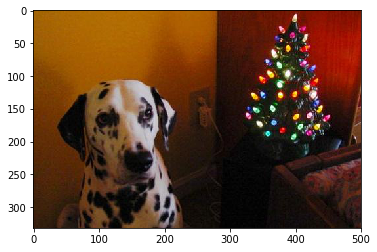




[[ 0.  -0.5  0. ]
 [-0.5  3.  -0.5]
 [ 0.  -0.5  0. ]]


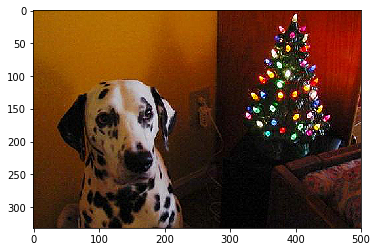




[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


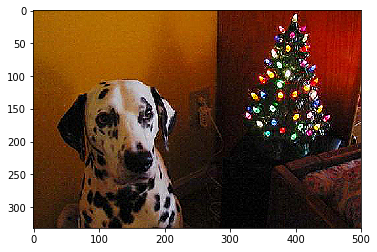




[[ 0 -2  0]
 [-2  9 -2]
 [ 0 -2  0]]


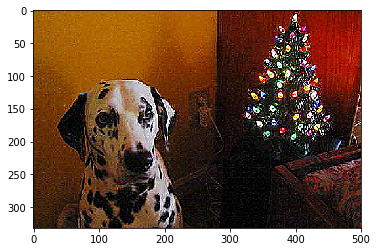

In [42]:
print ('original')
plt.imshow(cv_rgb)
plt.show()
print ('\n\n')
sharpens.shape = (3,3)
print (sharpens)
plt.imshow(new_imgs)
plt.show()
#print ('\n\n')
#sharpen025.shape = (3,3)
#print (sharpen025)
#plt.imshow(new_img025)
#plt.show()
#print ('\n\n')
#sharpen075.shape = (3,3)
#print (sharpen075)
#plt.imshow(new_img075)
#plt.show()
print ('\n\n')
sharpen0.shape = (3,3)
print (sharpen0)
plt.imshow(new_img0)
plt.show()
print ('\n\n')
sharpen.shape = (3,3)
print (sharpen)
plt.imshow(new_img)
plt.show()
#print ('\n\n')
#sharpen1.shape = (3,3)
#print (sharpen1)
#plt.imshow(new_img1)
#plt.show()
#print ('\n\n')
#sharpen2.shape = (3,3)
#print (sharpen2)
#plt.imshow(new_img2)
#plt.show()

In [45]:
edge_img0 = convolve(cv_rgb, edge0)
edge_img05 = convolve(cv_rgb, edge05)
edge_img015 = convolve(cv_rgb, edge015)
edge_img8 = convolve(cv_rgb, edge8)
edge_img85 = convolve(cv_rgb, edge85)


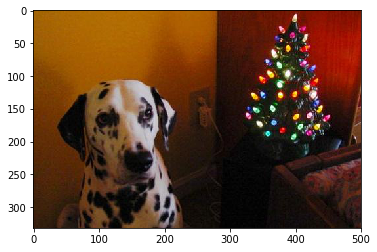

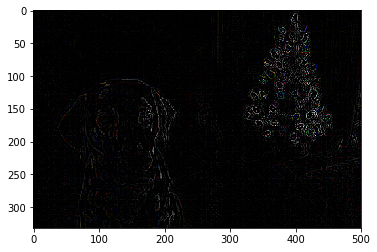

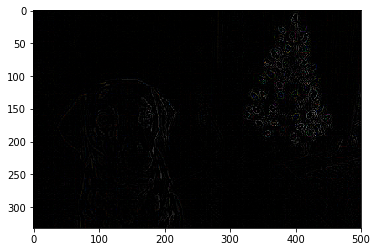

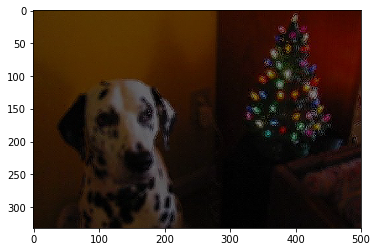

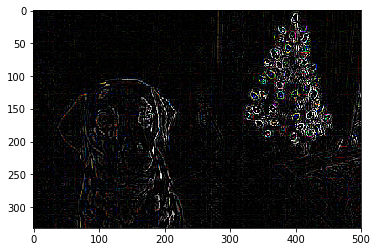

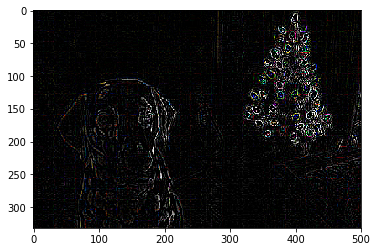

In [46]:
plt.imshow(cv_rgb)
plt.show()
plt.imshow(edge_img0)
plt.show()
plt.imshow(edge_img05)
plt.show()
plt.imshow(edge_img015)
plt.show()
plt.imshow(edge_img8)
plt.show()
plt.imshow(edge_img85)
plt.show()

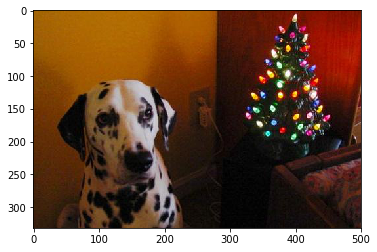

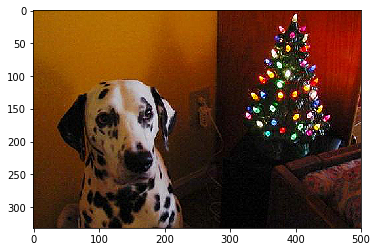

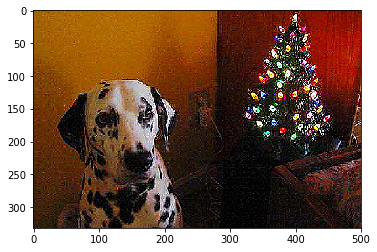

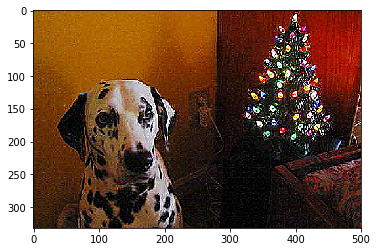

In [48]:
new_imgs2 = convolve (new_imgs, sharpens)
plt.imshow(cv_rgb)
plt.show()
plt.imshow(new_imgs)
plt.show()
plt.imshow(new_imgs2)
plt.show()
plt.imshow(new_img)
plt.show()

In [49]:
edged1 = np.array([0,0,0,-1,1,0,0,0,0])
edged1.shape = (3,3)
edged2 = np.array([0,0,0,-2,2,0,0,0,0])
edged2.shape = (3,3)
edged3 = np.array([0,0,0,-3,3,0,0,0,0])
edged3.shape = (3,3)
edged3d = np.array([-3,0,0,0,3,0,0,0,0])
edged3d.shape = (3,3)

In [17]:
edged1

array([[ 0,  0,  0],
       [-1,  1,  0],
       [ 0,  0,  0]])

In [50]:
edged_img1 = convolve(cv_rgb, edged1)
edged_img2 = convolve(cv_rgb, edged2)
edged_img3 = convolve(cv_rgb, edged3)
edged_img3d = convolve(cv_rgb, edged3d)

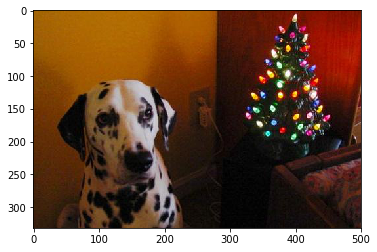

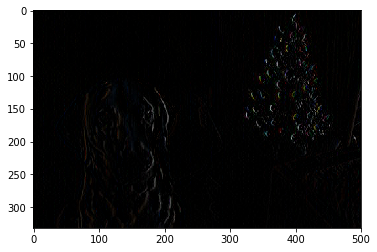

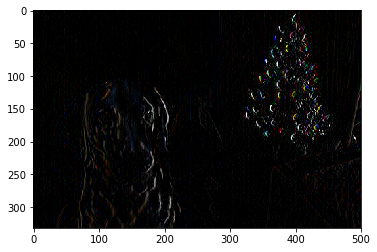

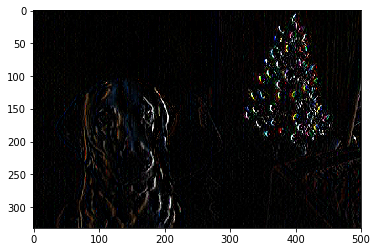

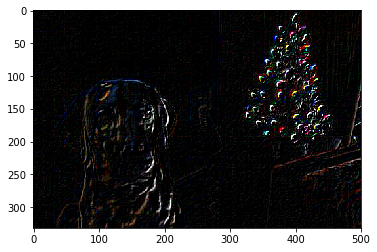

In [51]:
plt.imshow(cv_rgb)
plt.show()
plt.imshow(edged_img1)
plt.show()
plt.imshow(edged_img2)
plt.show()
plt.imshow(edged_img3)
plt.show()
plt.imshow(edged_img3d)
plt.show()

In [58]:
edgede1 = np.array([0,0,0,0,1,-1,0,0,0])
edgede1.shape = (3,3)
edgede2 = np.array([0,0,0,0,2,-2,0,0,0])
edgede2.shape = (3,3)
edgede3 = np.array([0,0,0,0,3,-3,0,0,0])
edgede3.shape = (3,3)

In [59]:
edgede_img1 = convolve(cv_rgb, edgede1)
edgede_img2 = convolve(cv_rgb, edgede2)
edgede_img3 = convolve(cv_rgb, edgede3)

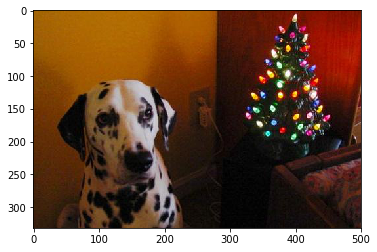

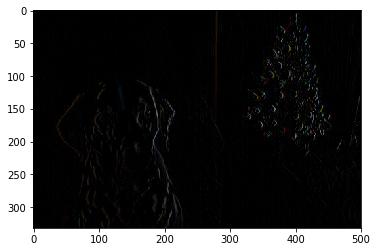

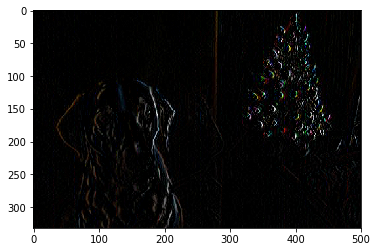

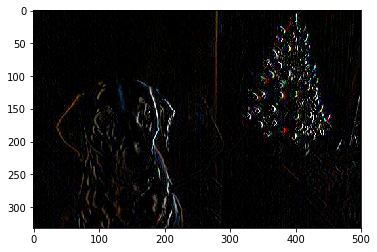

In [60]:
plt.imshow(cv_rgb)
plt.show()

plt.imshow(edgede_img1)
plt.show()
plt.imshow(edgede_img2)
plt.show()
plt.imshow(edgede_img3)
plt.show()

In [61]:
edgedn1 = np.array([0,-1,0,0,1,0,0,0,0])
edgedn1.shape = (3,3)
edgedn2 = np.array([0,-2,0,0,2,0,0,0,0])
edgedn2.shape = (3,3)
edgedn3 = np.array([0,-3,0,0,3,0,0,0,0])
edgedn3.shape = (3,3)

In [62]:
edgedn_img1 = convolve(cv_rgb, edgedn1)
edgedn_img2 = convolve(cv_rgb, edgedn2)
edgedn_img3 = convolve(cv_rgb, edgedn3)

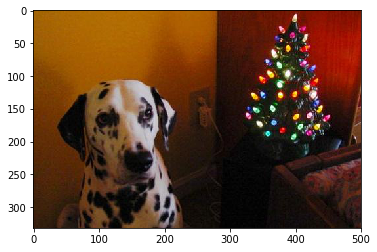

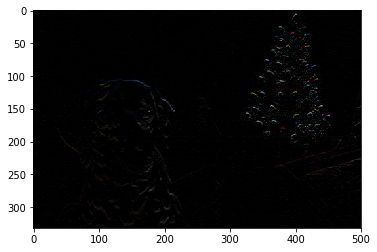

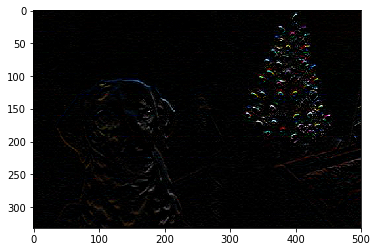

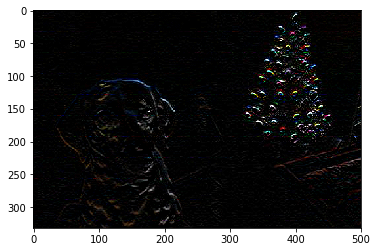

In [63]:
plt.imshow(cv_rgb)
plt.show()

plt.imshow(edgedn_img1)
plt.show()
plt.imshow(edgedn_img2)
plt.show()
plt.imshow(edgedn_img3)
plt.show()

In [68]:
other = np.array([0,0,0,-1,1,1,0,0,0])
other.shape = (3,3)
other1 = np.array([0,0,0,-2,1,2,0,0,0])
other1.shape = (3,3)
other2 = np.array([0,0,0,-3,1,3,0,0,0])
other2.shape = (3,3)

In [69]:
other_img = convolve(cv_rgb, other)
other_img1 = convolve(cv_rgb, other1)
other_img2 = convolve(cv_rgb, other2)

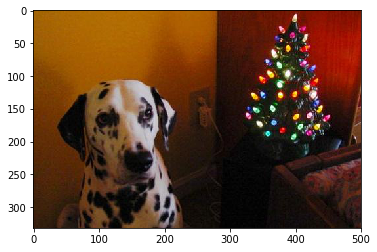

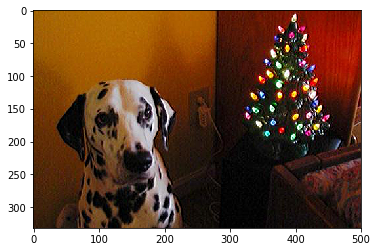

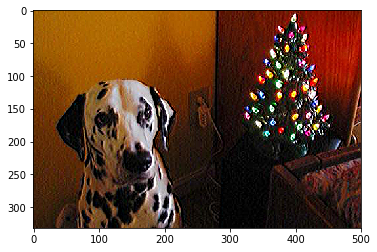

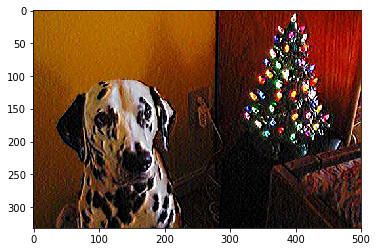

In [70]:
plt.imshow(cv_rgb)
plt.show()

plt.imshow(other_img)
plt.show()
plt.imshow(other_img1)
plt.show()
plt.imshow(other_img2)
plt.show()

In [71]:
othere = np.array([0,0,0,1,1,-1,0,0,0])
othere.shape = (3,3)
othere1 = np.array([0,0,0,2,1,-2,0,0,0])
othere1.shape = (3,3)
othere2 = np.array([0,0,0,3,1,-3,0,0,0])
othere2.shape = (3,3)

othern = np.array([-2,0,0,0,1,0,0,0,2])
othern.shape = (3,3)
othern1 = np.array([2,0,0,0,1,0,0,0,-2])
othern1.shape = (3,3)
othern2 = np.array([0,-2,0,0,1,0,0,2,0])
othern2.shape = (3,3)

In [72]:
othere_img = convolve(cv_rgb, othere)
othere_img1 = convolve(cv_rgb, othere1)
othere_img2 = convolve(cv_rgb, othere2)

In [73]:
othern_img = convolve(cv_rgb, othern)
othern_img1 = convolve(cv_rgb, othern1)
othern_img2 = convolve(cv_rgb, othern2)

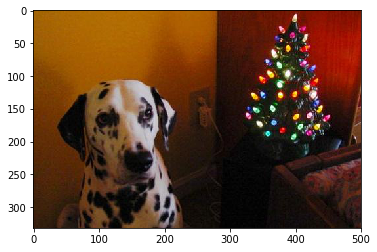

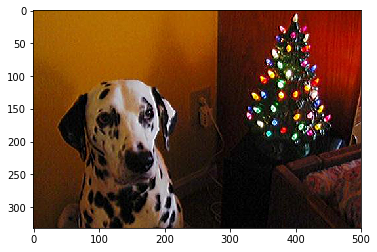

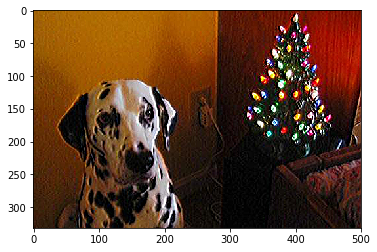

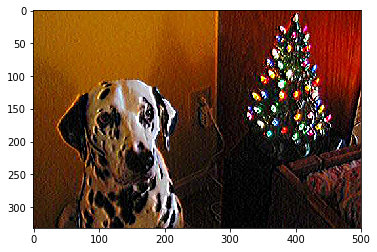

In [74]:
plt.imshow(cv_rgb)
plt.show()

plt.imshow(othere_img)
plt.show()
plt.imshow(othere_img1)
plt.show()
plt.imshow(othere_img2)
plt.show()

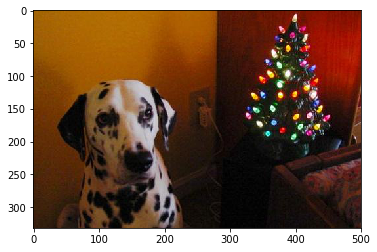

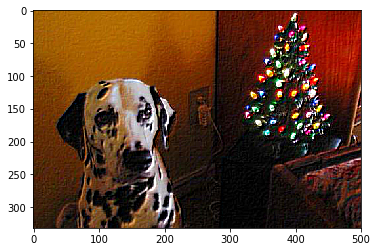

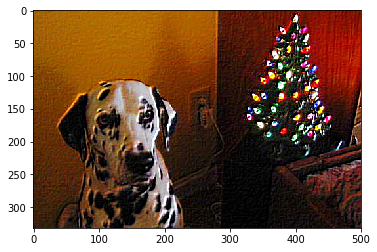

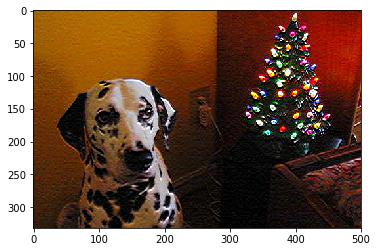

In [75]:
plt.imshow(cv_rgb)
plt.show()

plt.imshow(othern_img)
plt.show()
plt.imshow(othern_img1)
plt.show()
plt.imshow(othern_img2)
plt.show()